# Interpolation

In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate, linalg

## Introduction

Starting from a set of measurement (or simulated) data, you'll often want to perform further analysis, which requires you to use intermediate (or interpolated) data points for which you don't know the exact value. 

Depending on the situation, it might be appropriate to use a least-squares approximation to fit your data to an underlying physical model. In other situations, it is better to try to fit your data exactly, using interpolation.

The main difference between an approximate fitting procedure and interpolation is that the function must match the given data values exactly.
**Interpolation** thus means fitting some function to given data so that the function has the same values as the given data.

There are many different purposes for which you might want to use interpolation:
- Plotting a smooth curve through discrete data points
- Reading between the lines of a table
- Differentiating or integrating tabular data
- Evaluating a mathematical function quickly and easily
- Replacing a complicated function by a simple one

For given data
$(t_i,y_i), i=1,\ldots,m,$

with $t_1 < t_2<\ldots<t_m$, we seek a function $f: \mathbb{R} \rightarrow \mathbb{R}$ such that

$f(t_i)=y_i, i=1,\ldots,m,$

We call $f$ an **interpolating function** or **interpolant**.

The question of existence and uniqueness of an interpolant comes down to matching the number of parameters in the interpolant to the number of data points to be fit: if there are too few parameters, then the interpolant does not exist; if there are too many parameters, then the interpolant is not unique.

For a given set of data points $(t_i,y_i), i=1,\ldots,m,$, an interpolant is chosen from the space of functions spanned by a suitable set of **basis functions** $\phi_1(t),\ldots,\phi_n(t)$. 

The interpolating function $f$ is therefore expressed as a linear combination of these basis functions

$$
f(t)=\sum^n_{j=1}x_j\phi_j(t)
$$

where the parameters $x_j$ are to be determined. Requiring that $f$ interpolate the data $(t_i,y_i)$ means that

$$
f(t_i)=\sum^n_{j=1}x_j\phi_j(t_i)=y_i
$$

which is a system of linear equations that we can write in matrix form as
$\mathbf{Ax}=\mathbf{y}$,
where the entries of the **basis matrix** $\mathbf{A}$ are given by $a_{ij}=\phi_j(t_i)$, the components of the right-hand-side vector $\mathbf{y}$ are the known data points $y_i$, and the components of the vector $\mathbf{x}$ the unknown parameters $x_j$ we want to determine.

## Polynomial interpolation of discrete data

We denote by $\mathbb{P}_k (k\geq 0)$ the set of polynomials with degree lower or equal than $k$. $\mathbb{P}_k$ then is a vector space of dimension $k+1$. The particular choice of basis functions has a tremendous effect on the computational cost.

### Monomial basis

To interpolate $n$ data points, we choose $k=n-1$ so that the dimension of the space will match the number of data points. An obvious basis for $\mathbb{P}_{n-1}$ is given by the first $n$ **monomials**

$$\phi_j(t)=t^{j-1}$$

for which a given polynomial $p_{n-1} \in \mathbb{P}_{n-1}$ has the form

$$p_{n-1}(t)=x_1+x_2t+\cdots+x_nt^{n-1}$$

The system of equations we want to solve is

$$
\mathbf{Ax}=\begin{bmatrix}1 & t_1 & t_1^2 &\cdots& t_1^{n-1}\\
1 & t_2 & t_2^2 & \cdots& t_2^{n-1}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&t_n& t_n^2 &\cdots&t^{n-1}_n
\end{bmatrix}\begin{bmatrix}x1\\x_2\\\vdots\\x_n\end{bmatrix}=\begin{bmatrix}y1\\y_2\\\vdots\\y_n\end{bmatrix}=\mathbf{y}
$$



> **Example**
>
> We will determine the polynomial of degree two $p_2(t)=x_1+x_2t+x_3t^2$ which interpolates the three data points
>
> | t  | y   |
> |----|-----|
> | -2 | -27 |
> | 0  | -1  |
> | 1  | 0   |
>
> In the monomial basis, the coeffecients are the solution of the system of linear equations
> 
> $$
\mathbf{Ax}=\begin{bmatrix}
1 & t_1 & t_1^2 \\
1 & t_2 & t_2^2 \\
1 & t_3 & t_3^2
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}=\mathbf{y}
$$
>
> which becomes
>
> $$
\begin{bmatrix}
1 & -2 & 4 \\
1 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=\begin{bmatrix}
-27 \\
-1 \\
0
\end{bmatrix}
$$
>
> Solving this system using the methods seen before, we find the solution $\mathbf{x}\intercal= [-1, 5, -4]$,
so that the interpolating polynomial is 
>
> $$
p_2(t)=-1+5t-4t^2
$$

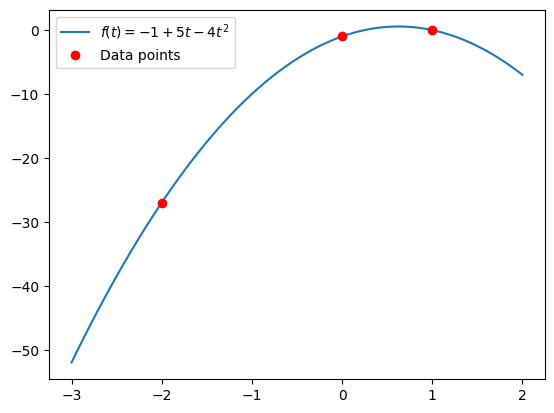

In [4]:
def demo_mono_interpol():
    """Plot interpolation of data set using a monomial basis"""

    def f(t):
        """Define interpolating polynomial"""
        return -1 + 5 * t - 4 * t**2

    plt.close("mono")
    fig, ax = plt.subplots(num="mono")
    points = [(-2, -27), (0, -1), (1, 0)]
    x_points, y_points = zip(*points, strict=False)
    t_values = np.linspace(-3, 2, 100)
    ax.plot(t_values, f(t_values), label="$f(t) = -1 + 5t - 4t^2$")
    ax.plot(x_points, y_points, "ro", label="Data points")
    ax.legend()


demo_mono_interpol()

Such a matrix, whose columns are subsequent powers of a variable is called a **Vandermonde matrix**.

Although it is not singular, it is often *nearly singular* because the functions become increasingly difficult to distinguish as the degrees increase (see figure below). This makes the columns of the Vandermonde matrix almost linearly dependent.

In [5]:
# Helper functions to make nice inline labels on plots.
# Adapted from https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib


def label_line(line, x, label=None, **kwargs):
    """Label line with line2D label data."""
    ax = line.axes
    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if (x < xdata[0]) or (x > xdata[-1]):
        print("x label location is outside data range!")
        return

    # Find corresponding y co-ordinate and angle of the line
    ip = 1
    for i in range(len(xdata)):
        if x < xdata[i]:
            ip = i
            break

    y = ydata[ip - 1] + (ydata[ip] - ydata[ip - 1]) * (x - xdata[ip - 1]) / (
        xdata[ip] - xdata[ip - 1]
    )

    if not label:
        label = line.get_label()

    # Set a bunch of keyword arguments
    if "color" not in kwargs:
        kwargs["color"] = line.get_color()

    if ("horizontalalignment" not in kwargs) and ("ha" not in kwargs):
        kwargs["ha"] = "center"

    if ("verticalalignment" not in kwargs) and ("va" not in kwargs):
        kwargs["va"] = "center"

    if "backgroundcolor" not in kwargs:
        kwargs["backgroundcolor"] = ax.get_facecolor()

    if "clip_on" not in kwargs:
        kwargs["clip_on"] = True

    if "zorder" not in kwargs:
        kwargs["zorder"] = 2.5

    ax.text(x, y, label, **kwargs)


def label_lines(ax, xvals=None, **kwargs):
    lines = []
    labels = []

    # Take only the lines which have labels other than the default ones
    for line in ax.get_lines():
        label = line.get_label()
        if "_line" not in label:
            lines.append(line)
            labels.append(label)

    if xvals is None:
        xmin, xmax = ax.get_xlim()
        xvals = np.linspace(xmin, xmax, len(lines) + 2)[1:-1]

    for line, x, label in zip(lines, xvals, labels, strict=False):
        label_line(line, x, label, **kwargs)

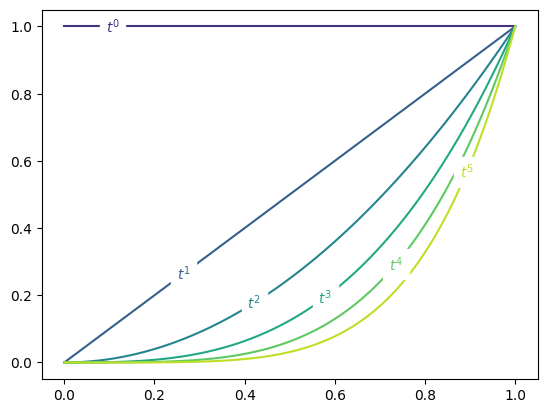

In [6]:
def monomial_basis(n):
    """Plot the first n monomial basis functions.

    Parameters
    ----------
    n
        The number of basis functions.

    """
    F = np.zeros((100, n + 1))
    F[:, 0] = np.linspace(0, 1, 100)
    plt.close("mono2")
    fig, ax = plt.subplots(num="mono2")
    for i in range(1, n + 1):
        F[:, i] = F[:, 0] ** (i - 1)
        color = plt.cm.viridis(0.75 * i / (n - 1))
        ax.plot(F[:, 0], F[:, i], color=color, label=f"$t^{i-1!s}$")

    label_lines(ax)


monomial_basis(6)

Next to the computational cost of determining the interpolating polynomial, the cost of evaluating it is also an important factor in choosing the appropriate method. 

When represented in the monomial basis, a polynomial

$$
p_{n-1}(t)=x_1+x_2t+x_3t^2+\cdots+x_nt^{n-1}
$$

can be evaluated very efficiently using **Horner's method** also known as **Nested evaluation** or **synthetic division**:

$$
p_{n-1}(t)=x_1+t(x_2+t(x_3+t(\cdots(x_{n-1}+x_nt)\cdots)))
$$

which requires only $n$ summations and $n$ additions.

### Lagrange interpolation

For a given set of data points $(t_i,y_i), i=1,\ldots,m,$
the **Langrange basis functions** for $\mathbb{P}_{n-1}$ are given by

$$
l_j(t)=\frac{\prod^n_{k=1,k\neq j} (t-t_k)}{\prod^n_{k=1,k\neq j}(t_j-t_k)}
$$

It can be seen that:
- $l_j(t)$ is a polynomial of degree $n-1$.
- At the edges of each interval, we have

    $$
    l_j(t_i)=\begin{cases}
    1, & \text{if}\quad i=j. \\
    0, & \text{if}\quad i\neq j.
    \end{cases}
    $$

    which means that for this basis the matrix of the linear system $\mathbf{Ax}=\mathbf{y}$ is the identity matrix $\mathbf{I}$.

The interpolating polynomial then is

$$
p_{n-1}(t)= y_1l_1(t)+y_2l_2(t)+\cdots+y_nl_n(t)
$$
 
which is easy to construct.
 
The figure below shows the Lagrange basis functions for $n$ equally spaced points on the interval $[0,1]$.

/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_17966/470763939.py:24: RuntimeWarning: invalid value encountered in divide
  l[i] = L * W[i] / (t - T[i])


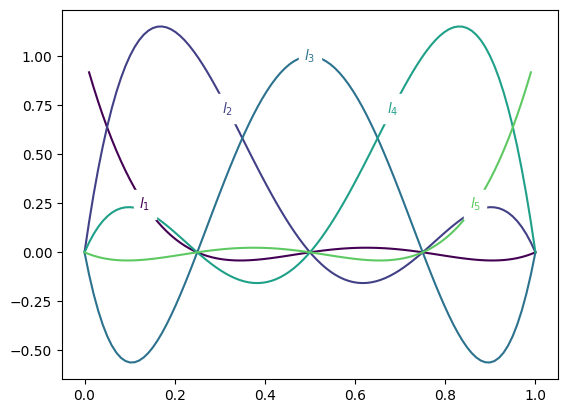

In [7]:
def lagrange_basis(n):
    """Plot the first n lagrange basis functions.

    Parameters
    ----------
    n
        The number of basis functions.

    """
    t = np.linspace(0, 1, 100)
    T = np.linspace(0, 1, n)
    L = np.ones(100)
    W = np.ones(n)
    for i in range(n):
        L = L * (t - T[i])

    for i in range(n):
        for j in range(n):
            if i != j:
                W[i] = W[i] / (T[i] - T[j])

    l = np.ones((n, 100))
    for i in range(0, n):
        l[i] = L * W[i] / (t - T[i])

    plt.close("lagrange")
    fig, ax = plt.subplots(num="lagrange")
    for i in range(n):
        color = plt.cm.viridis(0.75 * i / (n - 1))
        ax.plot(t, l[i], color=color, label=f"$l_{i+1!s}$")

    label_lines(ax)


lagrange_basis(5)

> **Example**
>
> For the same data points as the previous example 
>
> | t  | y   |
> |----|-----|
> | -2 | -27 |
> | 0  | -1  |
> | 1  | 0   |
>
> we find
>
> $$ \begin{aligned}
 l_1(t) &= \frac{(t-0)(t-1)}{(-2-0)(-2-1)}=\frac{t(t-1)}{6} \\
 l_2(t) &= \frac{(t+2)(t-1)}{(0+2)(0-1)}=\frac{(t+2)(t-1)}{-2} \\
 l_3(t) &= \frac{(t+2)(t-0)}{(1+2)(1-0)}=\frac{(t+2)t}{3}
 \end{aligned}$$
>
> $$
p_2(t)=\sum_{i=1}^3 y_i l_i(t)=\frac{-27}{6}t(t-1)+\frac{1}{2}(t+2)(t-1)+\frac{0}{3}t(t+2)
$$
>
> which simplifies to
> 
> $$p_2(t)=-1+5t-4t^2$$

In [8]:
# The same example, now with scipy
interpolate.lagrange(np.array([-2, 0, 1]), np.array([-27, -1, 0]))

poly1d([-4.,  5., -1.])

In [ ]:
def plot_lagrange(y1, y2, y3):
    poly_coef = interpolate.lagrange(np.array([-2, 0, 1]), (y1, y2, y3))

    tt = np.linspace(-3, 3, 100)
    yy = poly_coef[2] * tt**2 + poly_coef[1] * tt + poly_coef[0]

    fig, ax = plt.subplots(num="lagrange2", clear=True, figsize=(6, 3))
    ax.scatter(np.array([-2, 0, 1]), (y1, y2, y3), s=80, c="purple")
    ax.plot(tt, yy, c="royalblue", linewidth=2)
    ax.grid()
    ax.set_xlim(-2.5, 2.5)
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.set_title("Lagrange interpolation")


plt.close("lagrange2")
widgets.interact(plot_lagrange, y1=(-30, 30, 1), y2=(-30, 30, 1), y3=(-30, 30, 1))

### Newton interpolation

In the previous two cases, we encountered a basis matrix $\mathbf{A}$ which is full (monomial) or diagonal (Lagrange). For **Newton interpolation** the basis matrix will be triangular.

For a given set of data points $(t_i,y_i), i=1,\ldots,m,$
the **Newton basis functions** for $\mathbb{P}_{n-1}$ are given by

$$
\pi_j(t)=\prod^{j-1}_{k=1} (t-t_k)
$$

Note that we assign $\pi_j(t)=1$ for $j=1$

The interpolating polynomial then has the form

$$
p_{n-1}(t)=x_1+x_2(t-t_1)+x_3(t-t_1)(t-t_2)+\cdots x_n(t-t_1)\ldots(t-t_{n-1})
$$

From the definition it can be seen that the basis matrix $\mathbf{A}$ is lower triangular, so the system $\mathbf{Ax}=\mathbf{y}$ can efficiently be solved by forward substitution.

Furthermore, once we know the coefficients $x_i$, the resulting polynomial can efficiently be evaluated using Horner's nested scheme

$$
p_{n-1}(t)=x_1+(t-t_1)\left[x_2+(t-t_2)\left[x_3+(t-t_3)\left[\cdots(x_{n-1}+x_n(t-t_{n-1}))\cdots\right]\right]\right]
$$

The cell below shows the newton basis functions for $n$ equally spaced points on the interval $[0,2]$.

In [ ]:
def newton_basis(n):
    """Plot the first n newton basis functions.

    Parameters
    ----------
    n
        The number of basis functions.

    """
    t = np.linspace(0, 2, 100)
    T = np.linspace(0, 2, n)
    P = np.ones((n, 100))

    for i in range(n):
        for j in range(i):
            P[i] = P[i] * (t - T[j])

    plt.close("newton")
    fig, ax = plt.subplots(num="newton")
    for i in range(n):
        color = plt.cm.viridis(0.75 * i / (n - 1))
        ax.plot(t, P[i], color=color, label=rf"$\pi_{i+1!s}$")

    label_lines(ax)


newton_basis(5)

> **Example**
>
> In general we have:
>
> $$\begin{bmatrix} 1&0&0\\
1&t_2-t_1&0\\
1&t_3-t_1&(t_3-t_1)(t_3-t_2)\\
\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}$$
>
> filling in the same 3 data points as before, we find 
>
>
> | t  | y   |
> |----|-----|
> | -2 | -27 |
> | 0  | -1  |
> | 1  | 0   |
>
> $$\begin{bmatrix} 1&0&0\\
1&2&0\\
1&3&3\\
\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}-27\\-1\\0\end{bmatrix}$$
>
> Using forward substitution, we find $\mathbf{x}^\intercal=[-27,13,4]$,
so the interpolating polynomial is
>
> $$p(t)=-27+13(t+2)-4(t+2)t$$
> 
> which (as expected) simplifies to
> 
> $$p(t)=-1+5t-4t^2$$

Another useful property of the newton basis functions is that the interpolant can be constructed *incrementally* as more data points are added.

If $p_j(t)$ is a polynomial of degree $j-1$ which interpolates $j$ data points, then for any constant $x_{j+1}$

$$
p_{j+1}(t)=p_j(t)+x_{j+1}\pi_{j+1}(t)
$$

is a polynomial of degree $j$ that also interpolates the same $j$ points. The free parameter $x_{j+1}$ can be 
chosen so that $p_{j+1}(t)$ interpolates the new data points $y_{j+1}$ as

$$
x_{j+1}=\frac{y_{j+1}-p_j(t_{j+1})}{\pi_{j+1}(t_{j+1})}
$$

> **Example**
>
> Starting from the previous example, we have
>
> $$\begin{bmatrix}
1 & 0 \\
1 & t_2-t_1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=
\begin{bmatrix}
y_1 \\ y_2
\end{bmatrix}$$
>
> filling in first 2 data points, we find 
>
> $$\begin{bmatrix} 1 & 0 \\
1 & 2 \\
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=\begin{bmatrix} -27 \\ -1 \end{bmatrix}
$$
>
> Using forward substitution, we find $\mathbf{x}\intercal=[-27,13]$,
so the interpolating polynomial is
>
> $$p_2(t)=-27+13(t+2)$$
> 
> If we now want to add the additional data point [1,0], we can determine $x_3$ as
>
> $$x_{3}=\frac{y_{3}-p_2(t_{3})}{\pi_{3}(t_{3})}=\frac{0-[-27+13(1+2)]}{(1-0)(1+2)}=-4$$
>
> such that
>
> $$p_3(t)=p_2(t)+x_3\pi_3(t)=-27+13(t+2) -4 (t-0)(t+2)=-27+13(t+2)-4(t+2)t$$


### Polynomial interpolation of a continuous function

Interpolants of a high degree
- can be expensive to determine or evaluate (depending on the basis chosen)
- by definition a polynomial of degree $n$ has $n-1$ extrema, and thus many "wiggles"
Even if the polynomial passes through all required data points, it may fluctuate wildly in between these points and does not approximate an underlying function at all.

As an example, have a look at the Runge's function:

$$
f(t)=\frac{1}{1+25t^2}
$$

In [ ]:
def runge(x):
    return 1.0 / (1 + 25 * x**2)


def demo_cont_interpolation():
    """A poor interpolation of a continuous function at equidistant points."""
    t = np.linspace(-1, 1, 200)
    # 6 equidistant points
    x6 = np.linspace(-1, 1, 6)
    # polynomial interpolant of degree 5
    poly5 = interpolate.lagrange(x6, runge(x6))

    # 11 equidsitant points
    x11 = np.linspace(-1, 1, 11)
    # polynomial interpolant of degree 10
    poly10 = interpolate.lagrange(x11, runge(x11))

    plt.close("runge")
    fig, ax = plt.subplots(num="runge")
    ax.plot(t, runge(t), "k", label="f(t)")
    ax.plot(t, poly5(t), "r", label=r"$p_5(t)$")
    ax.plot(t, poly10(t), "b", label=r"$p_{10}(t)$")
    ax.legend()


demo_cont_interpolation()

The example shown above learns us that polynomial interpolants of increasing degree converge to the function in the middle of the interval, but diverge near the endpoints. More satisfactory results can be obtained if our sample points are bunched near the ends of the interval. 

One good way to achieve this is to use the **Chebysev points** which are defined on the interval $[-1,1]$, but can transformed to an arbitrary interval.

$$
t_i=\cos\left(\frac{(2i-1)\pi}{2k}\right),\quad \quad i=1,\ldots,k
$$

The example shown below shows that this indeed provides a better approximation to the underlying function.

In [ ]:
def chebysev(n):
    """Return the 'n' chebysev points in the interval [0:1].

    Parameters
    ----------
    n
        The number of chebysev points.

    """
    cheb_points = np.zeros(n)
    for i in range(n):
        cheb_points[i] = np.cos((2.0 * (i + 1.0) - 1.0) * np.pi / (2.0 * n))
    return cheb_points


def demo_cont_interpolation_chebysev():
    """Demo which illustrates that interpolating
    a continuous function evaluated at the chebysev
    points results in a better fit to the true function"""

    t = np.linspace(-1, 1, 200)
    # 6 chebysev points
    x6 = chebysev(6)
    # polynomial interpolant of degree 5
    poly5 = interpolate.lagrange(x6, runge(x6))

    # 11 chebysev points
    x21 = chebysev(21)
    # polynomial interpolant of degree 10
    poly10 = interpolate.lagrange(x21, runge(x21))

    plt.close("chebyshev")
    fig, ax = plt.subplots(num="chebyshev")
    ax.plot(t, runge(t), "k", label="f(t)")
    ax.plot(t, poly5(t), "r", label=r"$p_5$(t)")
    ax.plot(t, poly10(t), "b", label=r"$p_{10}$(t)")
    ax.legend()


demo_cont_interpolation_chebysev()

## Piecewise polynomial interpolation

Fitting a a single polynomial to a large number of data points will most likely result in unsatisfactory oscillating behavior. An alternative is **piecewise polynomial interpolation** or **spline interpolation**: the interval is divided into subintervals, and a *different* polynomial of low degree is constructed in each subinterval. For this reason, the points at which the interpolant changes are called **knots**.

Consider a set of ordered data points $(x_i,y_i)$ in the interval $[a,b]$. A function $S$ is called a spline interpolation of degree $k$ if
- $S$ is defined on the interval $[a,b]$
- the $r$th derivative of $S$ is continuous in the interval $[a,b]$ for $0\leq r\leq k-1$
- $S$ is a polynomial of degree $\leq k$ in every subinterval between the knots

The simplest case is $k=1$ for which $S_j$ is a straight line and the spline is a piecewise linear interpolation, as shown below.

In [ ]:
def linear_spline_demo():
    """Demo which shows a linear interplation between a few data points"""
    x = np.linspace(0, 1, 8)
    y = np.sin(12.0 * x) / (x + 0.1)
    f = interpolate.interp1d(x, y, kind="linear")
    t = np.linspace(0, 1, 100)

    plt.close("pwlin")
    fig, ax = plt.subplots(num="pwlin")
    ax.plot(t, f(t), "-")
    ax.plot(x, y, "o")


linear_spline_demo()

### Cubic spline interpolation

#### Theory

A spline with $n$ knots has $(n-1)$ piecewise polynomials of degree $k$ that interpolate the data. The number of free parameters thus is $(k+1)(n-1)$.
For instance, a linear polynomial($k=1$, and with 2 free parameters per polynomial) has $2(n-1)$ free parameters and a **cubic spline** has $4(n-1)$.

- Interpolating the data requires $2(n-1)$ equations, because each of the $(n-1)$ polynomials must match the two data points at either end of the subinterval.
- Requiring the derivative to be continuous gives $(n-2)$ additional equations, because there are $(n-2)$ *interior* data points.
- Requiring that the second derivative is also continuous gives $(n-2)$ additional equations.

The spline of lowest degree that has sufficient variables to satisfy all these equations is a cubic spline ($4n-4$ variables for $4n-6$ conditions). The remaining two variables can be fixed in a number of ways:
- **clamped cubic spline**: Specifying the first derivative of the endpoints
- **natural spline**: forcing the second derivative to be zero at the endpoints
- **not-a-knot**: the third derivative of the spline is continuous at the one-but-outermost data points
- **periodic spline**: forcing equality of the first as well as second derivatives of the two outermost points (if the spline is to be periodic)

#### Example of `scipy.interpolate.CubicSpline` and its options

In the example below a cubic spline is shown through 10 data points sampled from a sine function.
Play around with the `bc_type` option (all options shown below) to see how they affect the resulting spline.

The derivatives of the spline are also shown, so see for yourself that the first and second derivatives are indeed continuous.

- `not-a-knot`: The first and second segment at a curve end are the same polynomial. It is a good default when there is no information on boundary conditions`

- `periodic`: The interpolated functions is assumed to be periodic of period `x[-1] - x[0]`. The first and last value of y must be identical: `y[0] == y[-1]`. This boundary condition will result in `y'[0] == y'[-1]` and `y''[0] == y''[-1]`.

- `clamped`: The first derivative at curves ends are zero. Assuming a 1D y, `bc_type=((1, 0.0), (1, 0.0))` is the same condition.

- `natural`: The second derivative at curve ends are zero. Assuming a 1D y, `bc_type=((2, 0.0), (2, 0.0))` is the same condition.

[Source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline)

In [ ]:
def cubic_spline_demo():
    """Demo which shows a cubic spline interplation between a few data points"""
    x = np.linspace(0, 1, 8)
    y = np.sin(12.0 * x) / (x + 0.1)
    f = interpolate.interp1d(x, y, kind="cubic")
    t = np.linspace(0, 1, 100)

    plt.close("cspline")
    fig, ax = plt.subplots(num="cspline")
    ax.plot(t, f(t), "-")
    ax.plot(x, y, "o")


cubic_spline_demo()

In [ ]:
def cubic_spline_detailed_demo():
    """Demo which shows a cubic spline interplation between a few data points"""
    x = np.arange(10)
    y = np.sin(x)
    cs = interpolate.CubicSpline(x, y, bc_type="not-a-knot")
    xs = np.arange(-0.5, 9.6, 0.1)

    plt.close("cspline2")
    fig, ax = plt.subplots(num="cspline2", figsize=(6.5, 4))
    ax.plot(xs, np.sin(xs), label="true")
    ax.plot(xs, cs(xs), label="S")
    ax.plot(xs, cs(xs, 1), label="S'")
    ax.plot(xs, cs(xs, 2), label="S''")
    ax.plot(xs, cs(xs, 3), label="S'''")
    ax.plot(x, y, "o", label="data")
    ax.set_xlim(-0.5, 9.5)
    ax.legend(loc="lower left", ncol=2)


cubic_spline_detailed_demo()

> **Example**
>
> Let's say that we want to fit a **clamped cubic spline** to the following points

> | x | y |
> |---|---|
> | 0 | 0 |
> | 1 | 2 |
> | 3 | 0 |
>
> This gives us 12 equations in total for the two splines
>
> $$S_1 = a_1x^3 + b_1x^2 + c_1x + d_1$$
>
> and
>
> $$S_2  = a_2x^3 + b_2x^2 + c_2x + d_2 $$
>
> with their respective first and second derivatives:
>
>
> $$
S = \begin{cases}
S_1(0) = d_1 = 0&\text{I}\\
S_1(1) = a_1 + b_1 + c_1 = 2&\text{II}\\
S_2(1) = a_2 + b_2 + c_2 + d_2 = 2&\text{III}\\
S_2(3) = 27 a_2 + 9b_2 + 3c_2 + d_2 = 0&\text{IV}\\
\end{cases}
$$
>
> $$
S' = \begin{cases}
S_1'(0) = c_1 = 0&\text{V}\\
S_1'(1) = 3a_1 + 2b_1&\text{VIa}\\
S_2'(1) = 3a_2 + 2b_2 + c_2 &\text{VIb}\\
S_2'(3) = 27 a_2 + 6b_2 + c_2  = 0&\text{VII}\\
\end{cases}
$$
>
> $$
S'' = \begin{cases}
S_1''(0) = 2b_1\\
S_1''(1) = 6a_1 + 2b_1&\text{VIIIa}\\
S_2''(1) = 6a_2 + 2b_2&\text{VIIIb}\\
S_2''(3) = 18a_2 + 2b_2
\end{cases}
$$
>
> This results in a system of 6 linear equations (II, III, IV, VIa - VIb, VII and VIIIa - VIIIb should all equal zero) for the 6 unknowns $[a_1, b_1, a_2, b_2, c_2, d_2]$ (because $c_1$ and $d_1$ are 0).
> It can be solved with LU-factorisation as follows:

In [ ]:
def interpolation_demo():
    # x = np.array([0, 1, 3, 4])
    # y = np.array([0, 2, 1, 0])
    b = np.array(
        [
            2,  # II
            2,  # III
            1,  # IV
            0,  # VIa - VIb
            0,  # VII
            0,  # VIIIa - VIIIb
        ]
    )
    A = np.array(
        [
            [1, 1, 0, 0, 0, 0],  # II
            [0, 0, 1, 1, 1, 1],  # III
            [0, 0, 27, 9, 3, 1],  # IV
            [3, 2, -3, -2, -1, 0],  # VIa - VIb
            [0, 0, 27, 6, 1, 0],  # VII
            [6, 2, -6, -2, 0, 0],  # VIIIa - VIIIb
        ]
    )
    coeff = linalg.lu_solve(linalg.lu_factor(A), b)
    return coeff


def s1(x):
    return a1 * x**3 + b1 * x**2


def s2(x):
    return a2 * x**3 + b2 * x**2 + c2 * x + d2


a1, b1, a2, b2, c2, d2 = interpolation_demo()
print(a1, b1, a2, b2, c2, d2)

> We can now plot both functions to compare them to each other

In [ ]:
def plot_example():
    plt.close("example")
    fig, ax = plt.subplots(num="example")

    # Calculate our splines using the interpolate.cubicsplines method
    f = interpolate.CubicSpline(
        np.array([0, 1, 3]), np.array([0, 2, 1]), bc_type="clamped"
    )
    # arange points along the x-axis to plot our function on
    xnew = np.linspace(0, 3, 100)
    ynew = f(xnew)
    ax.plot(xnew, ynew, lw=6, alpha=0.3, label="scipy")

    # plot S1
    x1 = np.linspace(0, 1, 30)
    ax.plot(x1, s1(x1), label="S1")

    # plot S2
    x2 = np.linspace(1, 3, 30)
    ax.plot(x2, s2(x2), label="S2")

    # plot the points that we interpolated through
    ax.plot(np.array([0, 1, 3]), np.array([0, 2, 1]), "ko")
    ax.legend()


plot_example()

> This shows that both methods return the same function. In practice you can always use the interpolate method that's already built in python to avoid any tedious work.

## Software

`scipy.interpolate` [link](https://docs.scipy.org/doc/scipy/reference/interpolate.html) contains a lot of different functions, many of which we have not considered here.

The main functions corresponding to the theory covered here are
- `lagrange` for Lagrange interpolation
- `CubicSpline` for cubic spline interpolation (with many options)
- `interp1d` to interpolate 1 dimensional data (also capable of finding cubic splines, but with less options)
- `griddata` to interpolate multidimensional data


### `interp1d`

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

In the example below, you can change `kind` to see the different possible interpolations.

> **Warning**: interp1d is considered legacy API and is not recommended for use in new code.
Consider using more specific interpolators instead.
It is still used in this notebook because it allows for a straightforward comparison of different interpolations.

In [ ]:
def interp1d_demo(kind):
    """Demo to show the different kinds of 1D interpolation.

    Parameters
    ----------
    kind
        The kind of interpolation:
        "linear", "nearest", "zero", "slinear", "quadratic",
        "cubic", "previous", or "next".
    """

    x = np.array([0, 1, 3, 4, 6, 7, 9, 10])
    y = np.array([8, 6, 5, 1, 1, 1, 1, 1])
    f = interpolate.interp1d(x, y, kind=kind)
    xnew = np.arange(0, 10, 0.1)
    ynew = f(xnew)

    fig, ax = plt.subplots(num="interp1d", clear=True)
    ax.plot(xnew, ynew, "-")
    ax.plot(x, y, "o")
    ax.set_title(f'Interpolation with interp1d: kind="{kind}"')


plt.close("interp1d")
widgets.interactive(
    interp1d_demo,
    kind=widgets.Dropdown(
        options=[
            "linear",
            "nearest",
            "zero",
            "slinear",
            "quadratic",
            "cubic",
            "previous",
            "next",
        ],
        description="Interpolation:",
    ),
)

### `griddata`

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)

Suppose you have multidimensional data, for instance, for an underlying function $f(x, y)$ you only know the values at points $(x[i], y[i])$ that do not form a regular grid.

Suppose we want to interpolate the 2-D function

$$f(x,y)=x(1-x)\cos(4\pi x) \sin(4\pi y^2)^2$$

on a grid in $[0, 1]\times[0, 1]$
but we only know its values at $n$ data points.

Then we can use `griddata` to interpolate our function

In [ ]:
def griddata_demo(n):
    """Demo to show the usage of the griddata function.

    Parameters
    ----------
    n        The number of data points we're interpolating between
    """

    def func(x, y):
        return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y**2) ** 2

    grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
    rng = np.random.default_rng()
    points = rng.random((n, 2))
    values = func(points[:, 0], points[:, 1])
    grid_z2 = interpolate.griddata(points, values, (grid_x, grid_y), method="cubic")
    plt.close("griddata")
    fig, axs = plt.subplots(
        1,
        3,
        figsize=(8, 4),
        gridspec_kw={"width_ratios": [1, 1, 0.05]},
        num="griddata",
    )
    axs[0].imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin="lower")
    axs[0].plot(points[:, 0], points[:, 1], "k.", ms=1)
    axs[0].set_title("Original")
    img = axs[1].imshow(grid_z2.T, extent=(0, 1, 0, 1), origin="lower")
    axs[1].set_title("Cubic")
    fig.colorbar(img, cax=axs[2])


griddata_demo(1000)